In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV file
file_path = 'london_houses.csv'
london_houses_data = pd.read_csv(file_path)

# Display the first few rows
london_houses_data.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [18]:
# Table 2: Count of properties by neighborhood and property type
neighborhood_property_type_counts = london_houses_data.groupby(["Neighborhood", "Property Type"]).size().unstack(fill_value=0)
neighborhood_property_type_counts.to_csv("table1.csv")
neighborhood_property_type_counts

Property Type,Apartment,Detached House,Semi-Detached
Neighborhood,,,
Camden,30,35,41
Chelsea,24,33,37
Greenwich,31,35,31
Islington,27,36,34
Kensington,38,28,48
Marylebone,38,47,28
Notting Hill,28,38,30
Shoreditch,35,29,25
Soho,27,32,37


In [19]:
price_by_view = london_houses_data.groupby("View")["Price (£)"].agg(["count", "mean", "sum"]).rename(
    columns={"count": "Total Properties", "mean": "Average Price (£)", "sum": "Total Price (£)"}
)
price_by_view = price_by_view.round(2)
price_by_view.to_csv("table2.csv")
price_by_view

,Total Properties,Average Price (£),Total Price (£)
View,,,
City,196,1912561.40,374862034
Garden,206,1830933.80,377172362
Park,204,1765154.37,360091492
Sea,210,1878492.50,394483426
Street,184,1816293.28,334197964


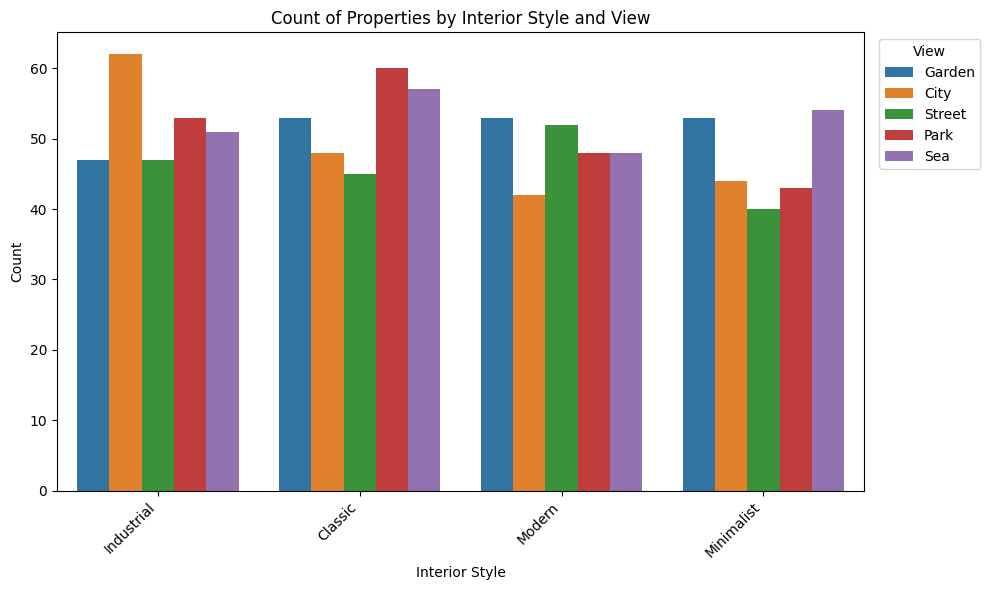

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=london_houses_data, x="Interior Style", hue="View")
plt.xticks(rotation=45, ha='right')
plt.title("Count of Properties by Interior Style and View")
plt.ylabel("Count")
plt.xlabel("Interior Style")
plt.legend(title="View", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

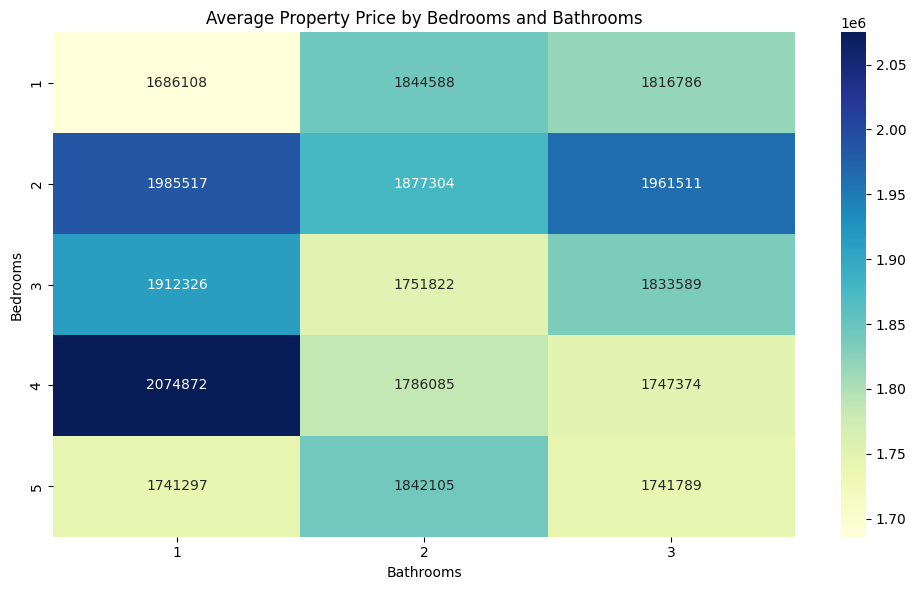

In [8]:
avg_price_bed_bath = london_houses_data.groupby(["Bedrooms", "Bathrooms"])["Price (£)"].mean().reset_index()
avg_price_bed_bath_pivot = avg_price_bed_bath.pivot_table(index="Bedrooms", columns="Bathrooms", values="Price (£)")

plt.figure(figsize=(10, 6))
sns.heatmap(avg_price_bed_bath_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Property Price by Bedrooms and Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Bedrooms")
plt.tight_layout()
plt.show()

C:\Users\anish\AppData\Local\Temp\ipykernel_3964\4228145633.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_age_bin = london_houses_data.groupby(building_age_bins)["Price (£)"].mean()


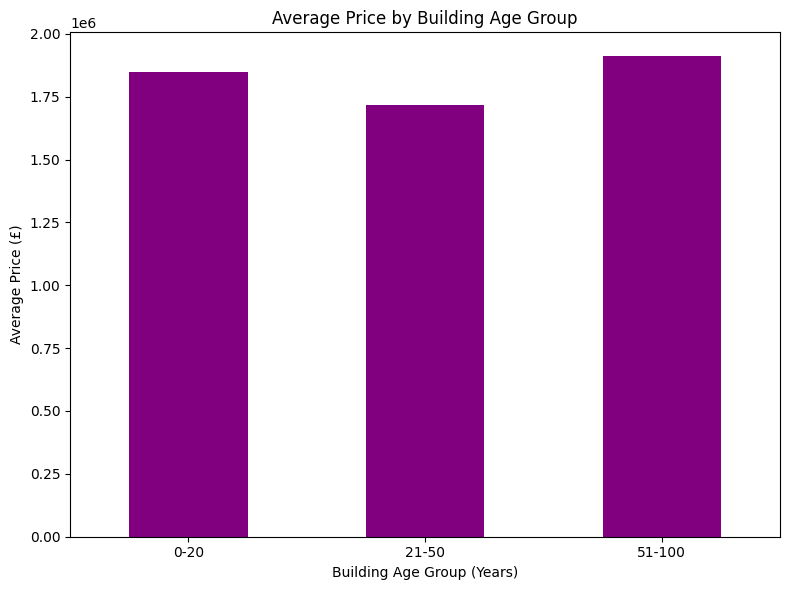

In [20]:
# Exploring the relationship between building age and price
building_age_bins = pd.cut(london_houses_data["Building Age"], bins=[0, 20, 50, 100], labels=["0-20", "21-50", "51-100"])
avg_price_by_age_bin = london_houses_data.groupby(building_age_bins)["Price (£)"].mean()

# Plot 12: Average price by building age group
plt.figure(figsize=(8, 6))
avg_price_by_age_bin.plot(kind="bar", color="purple")
plt.title("Average Price by Building Age Group")
plt.xlabel("Building Age Group (Years)")
plt.ylabel("Average Price (£)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

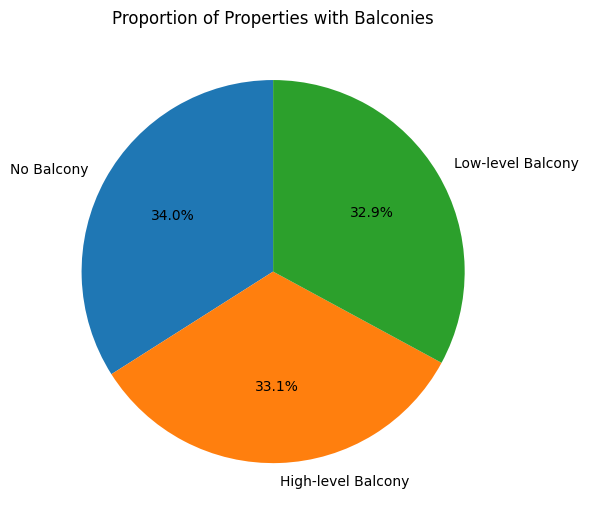

In [12]:
# Pie Plot: Proportion of properties with balconies
balcony_proportion = london_houses_data["Balcony"].value_counts()

plt.figure(figsize=(6, 6))
balcony_proportion.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Properties with Balconies")
plt.ylabel("")  # Hides the y-axis label
plt.tight_layout()
plt.show()